In [ ]:
# Intall Kaggle Library
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download rishidamarla/heart-disease-prediction
!unzip heart-disease-prediction.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists
  0% 0.00/3.41k [00:00<?, ?B/s]
100% 3.41k/3.41k [00:00<00:00, 1.68MB/s]
Archive:  heart-disease-prediction.zip
  inflating: Heart_Disease_Prediction.csv  


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv('Heart_Disease_Prediction.csv')
data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [ ]:
data.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [ ]:
data['Heart Disease'].value_counts()

Absence     150
Presence    120
Name: Heart Disease, dtype: int64

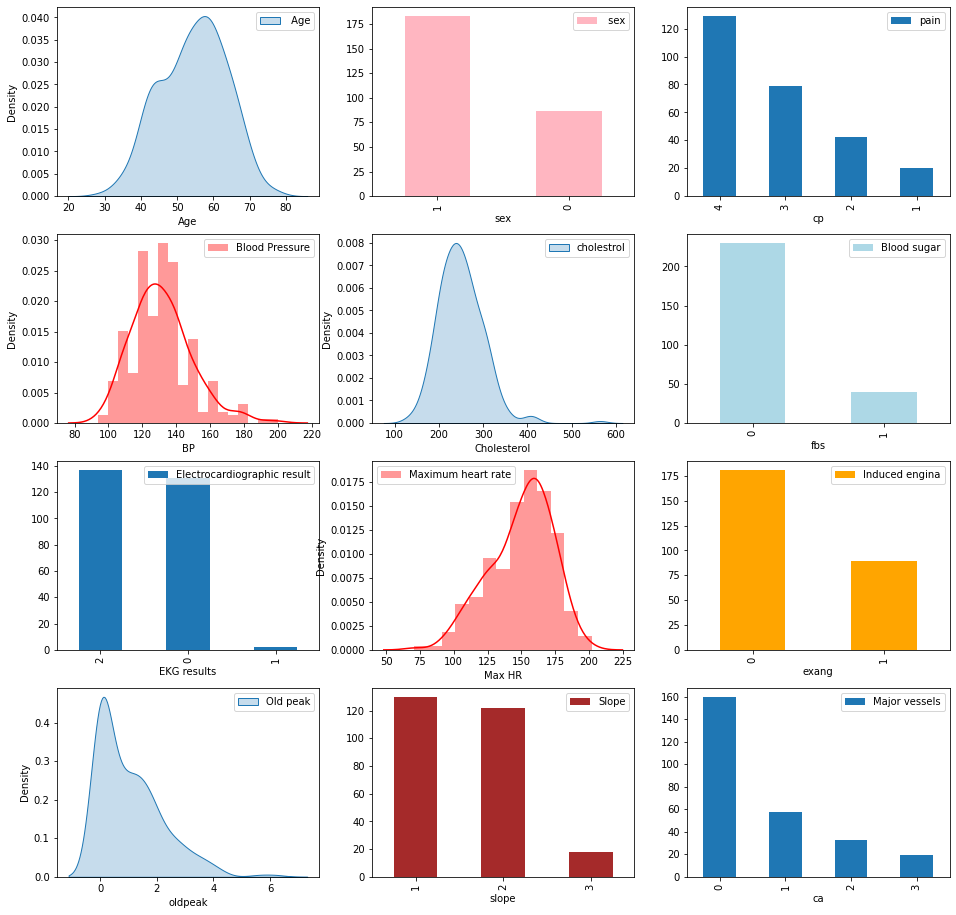

In [ ]:
fig=plt.figure(figsize=(16, 16))
fig = plt.subplot(431)
sns.kdeplot(data['Age'],shade=True,label=' Age')
# plt.title ('Distribution of Age')
plt.legend()
fig = plt.subplot(432)
data['Sex'].value_counts().plot(kind='bar',label=' sex', color="lightpink")
plt.xlabel('sex')
# plt.title ('Distribution of sex')
plt.legend()
fig = plt.subplot(433)
data['Chest pain type'].value_counts().plot(kind='bar',label='pain')
plt.xlabel('cp')
# plt.title ('Distribution of chest pain')
plt.legend()
fig = plt.subplot(434)
# sns.kdeplot(data['trtbps'],shade=True,label='blood pressure')
sns.distplot(data['BP'], color="red",  kde= True,label='Blood Pressure')
# plt.title ('Distribution of blood pressure')
plt.legend()
fig = plt.subplot(435)
sns.kdeplot(data['Cholesterol'],shade=True,label='cholestrol')
# plt.title ('Distribution of cholestrol')
plt.legend()
fig = plt.subplot(436)
data['FBS over 120'].value_counts().plot(kind='bar',label='Blood sugar', color="lightblue")
plt.xlabel('fbs')
# plt.title ('Distribution of blood sugar')
plt.legend()
fig = plt.subplot(437)
data['EKG results'].value_counts().plot(kind='bar',label='Electrocardiographic result')
plt.xlabel('EKG results')
# plt.title ('Distribution of electrocardiographic result')
plt.legend()
fig = plt.subplot(438)
# sns.kdeplot(data['thalachh'],shade=True,label='Maximum heart rate')
sns.distplot(data['Max HR'], color="red",  kde= True,label='Maximum heart rate')
# plt.title ('Distribution of maximum heart rate')
plt.legend()
fig = plt.subplot(439)
data['Exercise angina'].value_counts().plot(kind='bar',label='Induced engina', color="orange")
plt.xlabel('exang')
# plt.title ('Distribution of induced engina')
plt.legend()
fig = plt.subplot(4,3,10)
sns.kdeplot(data['ST depression'],shade=True,label='Old peak')
plt.xlabel('oldpeak')
# plt.title ('Distribution of old peak')
plt.legend()
fig = plt.subplot(4,3,11)
data['Slope of ST'].value_counts().plot(kind='bar',label='Slope', color="brown")
plt.xlabel('slope')
# plt.title ('Distribution of slope')
plt.legend()
fig = plt.subplot(4,3,12)
data['Number of vessels fluro'].value_counts().plot(kind='bar',label='Major vessels')
plt.xlabel('ca')
# plt.title ('Distribution of no. of major vessels')
plt.legend()
plt.show()

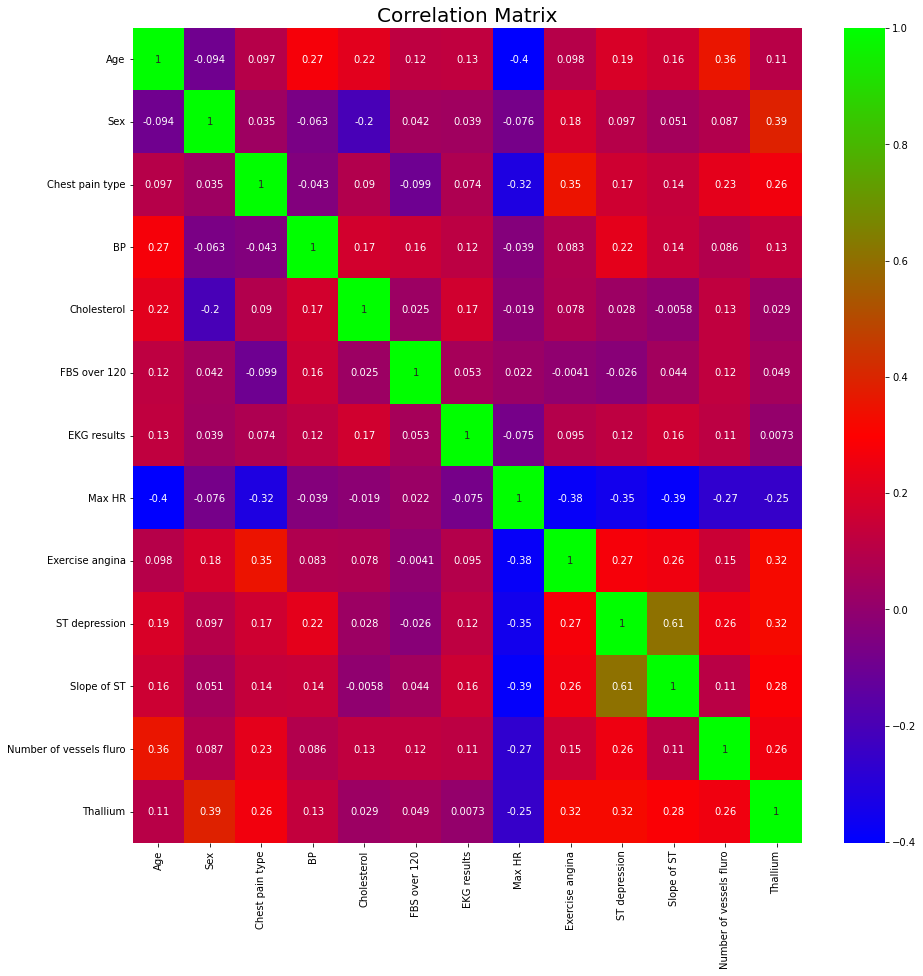

In [ ]:
plt.figure(figsize=(15, 15))
plt.title('Correlation Matrix', size=20)
sns.heatmap(data.corr(), annot = True, cmap = "brg")
plt.show()

In [ ]:
x= data.drop(columns= 'Heart Disease')
y= data['Heart Disease']

# splitting our dataset into training and testing for this we will use train_test_split library.
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=42)
print('X_train size: {}, X_test size: {}'.format(x_train.shape, x_test.shape))

#feature scaling
scaler= StandardScaler()
x_train_scaler= scaler.fit_transform(x_train)
x_test_scaler= scaler.fit_transform(x_test)


# creating Logistic Regression Model
LR_model= LogisticRegression()
LR_model.fit(x_train_scaler, y_train)
y_pred_LR= LR_model.predict(x_test_scaler)
LR_model.score(x_test_scaler,y_test)

print('Classification Report\n', classification_report(y_test, y_pred_LR))
print('Accuracy: {}%\n'.format(round((accuracy_score(y_test, y_pred_LR)*100),4)))

X_train size: (202, 13), X_test size: (68, 13)
Classification Report
               precision    recall  f1-score   support

     Absence       0.89      0.82      0.86        40
    Presence       0.77      0.86      0.81        28

    accuracy                           0.84        68
   macro avg       0.83      0.84      0.84        68
weighted avg       0.84      0.84      0.84        68

Accuracy: 83.8235%



In [ ]:
# creating Knn Model
Knn_model= KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
Knn_model.fit(x_train_scaler, y_train)
y_pred_knn= Knn_model.predict(x_test_scaler)
Knn_model.score(x_test_scaler,y_test)

print('Classification Report\n', classification_report(y_test, y_pred_knn))
print('Accuracy: {}%\n'.format(round((accuracy_score(y_test, y_pred_knn)*100),4)))

Classification Report
               precision    recall  f1-score   support

     Absence       0.84      0.90      0.87        40
    Presence       0.84      0.75      0.79        28

    accuracy                           0.84        68
   macro avg       0.84      0.82      0.83        68
weighted avg       0.84      0.84      0.84        68

Accuracy: 83.8235%



In [ ]:
SVC_model= SVC()
SVC_model.fit(x_train_scaler, y_train)
y_pred_SVC= SVC_model.predict(x_test_scaler)
SVC_model.score(x_test_scaler,y_test)

print('Classification Report\n', classification_report(y_test, y_pred_SVC))
print('Accuracy: {}%\n'.format(round((accuracy_score(y_test, y_pred_SVC)*100),2)))

Classification Report
               precision    recall  f1-score   support

     Absence       0.87      0.82      0.85        40
    Presence       0.77      0.82      0.79        28

    accuracy                           0.82        68
   macro avg       0.82      0.82      0.82        68
weighted avg       0.83      0.82      0.82        68

Accuracy: 82.35%



In [ ]:
DT_model= DecisionTreeClassifier()
DT_model.fit(x_train_scaler, y_train)
y_pred_DT= DT_model.predict(x_test_scaler)
DT_model.score(x_test_scaler,y_test)

print('Classification Report\n', classification_report(y_test, y_pred_DT))
print('Accuracy: {}%\n'.format(round((accuracy_score(y_test, y_pred_DT)*100),2)))
cm = confusion_matrix(y_test, y_pred_DT)

Classification Report
               precision    recall  f1-score   support

     Absence       0.78      0.70      0.74        40
    Presence       0.62      0.71      0.67        28

    accuracy                           0.71        68
   macro avg       0.70      0.71      0.70        68
weighted avg       0.71      0.71      0.71        68

Accuracy: 70.59%



In [ ]:
RF_model= RandomForestClassifier(n_estimators=20)
RF_model.fit(x_train_scaler, y_train)
y_pred_RF= RF_model.predict(x_test_scaler)
RF_model.score(x_test_scaler,y_test)

print('Classification Report\n', classification_report(y_test, y_pred_RF))
print('Accuracy: {}%\n'.format(round((accuracy_score(y_test, y_pred_RF)*100),4)))

Classification Report
               precision    recall  f1-score   support

     Absence       0.82      0.93      0.87        40
    Presence       0.87      0.71      0.78        28

    accuracy                           0.84        68
   macro avg       0.85      0.82      0.83        68
weighted avg       0.84      0.84      0.84        68

Accuracy: 83.8235%



In [ ]:
import pickle

with open('model.pickle','wb') as f:
    pickle.dump(LR_model,f)